In [25]:
import sqlite3
import matplotlib.pyplot as plt

In [29]:
conn=sqlite3.connect("wildlife.db")
cursor=conn.cursor()

<span style="color:pink"> 🦝Which animals are observed most frequently?🦝</span>

In [45]:
cursor.execute("""SELECT d1.CommonName, COUNT(D2.SightingID) AS total FROM animals as d1 JOIN sightings as d2 ON d1.AnimalID=d2.AnimalID GROUP BY CommonName ORDER BY total DESC""")

animal_data=cursor.fetchall()

for i in animal_data:
    print(i)

habitats = [row[0] for row in animal_data]
sighting_counts = [row[1] for row in animal_data]

('Polar Bear', 5)
('Giant Panda', 5)
('Blue Whale', 5)
('Bengal Tiger', 5)
('African Elephant', 5)
('Great White Shark', 4)
('Giraffe', 4)
('Bald Eagle', 4)
('Red Fox', 3)
('Koala', 3)
('Siberian Tiger', 2)
('Kangaroo', 2)
('African Lion', 2)
('American Bison', 1)


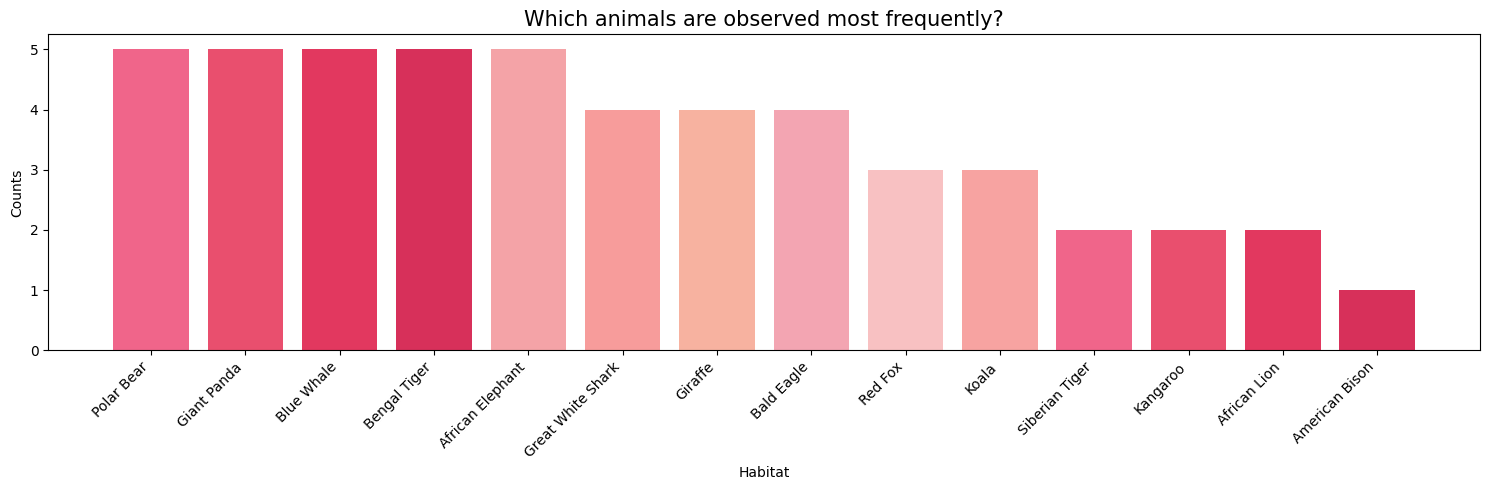

In [46]:
colors = ['#F0658A', '#E94F6E', '#E2385F', '#D7305A', '#F4A3A7', '#F79C9B', '#F7B2A0', '#F3A5B2', '#F8C1C2', '#F7A3A1']

plt.figure(figsize=(15,5))
plt.bar(habitats, sighting_counts, color=colors)
plt.xlabel('Habitat')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.title('Which animals are observed most frequently?', fontsize=15)
plt.tight_layout()
plt.show()

<span style="color:pink"> 🏝️What is the most common habitat for certain species?🏝️</span>

In [18]:
cursor.execute("""SELECT d1.CommonName, d1.Habitat
FROM animals AS d1 JOIN sightings AS d2 ON d1.AnimalID = d2.AnimalID
GROUP BY d1.Habitat ORDER BY COUNT(d2.AnimalID) DESC""")

animal_data_habitat=cursor.fetchall()

for i in animal_data_habitat:
    print(i)

('African Elephant', 'Savannah')
('Blue Whale', 'Oceans')
('Bengal Tiger', 'Tropical Forest')
('Giant Panda', 'Bamboo Forest')
('Polar Bear', 'Arctic')
('Bald Eagle', 'Forests, Lakes')
('Kangaroo', 'Grassland')
('Red Fox', 'Forest, Grassland')
('Koala', 'Eucalyptus Forest')
('Siberian Tiger', 'Taiga')


<span style="color:pink"> 🗺️How do individual animal sightings vary by region?🗺️</span>

In [22]:
cursor.execute("""SELECT d1.CommonName, d3.Region FROM animals as d1 JOIN sightings as d2 ON d1.AnimalID=d2.AnimalID JOIN locations as d3 ON d3.LocationID=d2.LocationID GROUP BY CommonName ORDER BY COUNT(d2.AnimalID)""")

animal_data_region=cursor.fetchall()

for i in animal_data_region:
    print(i)

('American Bison', 'Kenya')
('African Lion', 'Texas, USA')
('Kangaroo', 'Rwanda')
('Siberian Tiger', 'United Kingdom')
('Koala', 'France')
('Red Fox', 'Singapore')
('Bald Eagle', 'Arctic')
('Giraffe', 'Hong Kong')
('Great White Shark', 'United States')
('African Elephant', 'Africa')
('Bengal Tiger', 'Europe')
('Blue Whale', 'Pacific Ocean')
('Giant Panda', 'United Kingdom')
('Polar Bear', 'France')


<span style="color:pink"> 🗾How do sightings vary by region?🗾</span>

In [50]:
cursor.execute("""SELECT d3.Region, COUNT(d2.SightingID) AS NumberOfSightings
FROM sightings AS d2 JOIN locations AS d3 ON d3.LocationID = d2.LocationID
GROUP BY d3.Region ORDER BY NumberOfSightings DESC LIMIT 10""")

animal_data_region_2 = cursor.fetchall()

for region in animal_data_region_2:
    print(region)

region = [region[0] for region in animal_data_region_2]
sighting_counts = [counts[1] for counts in animal_data_region_2]

('Africa', 5)
('United States', 4)
('South America', 3)
('Russia', 3)
('France', 3)
('Asia', 3)
('United Kingdom', 2)
('Thailand', 2)
('Pacific Ocean', 2)
('North America', 2)


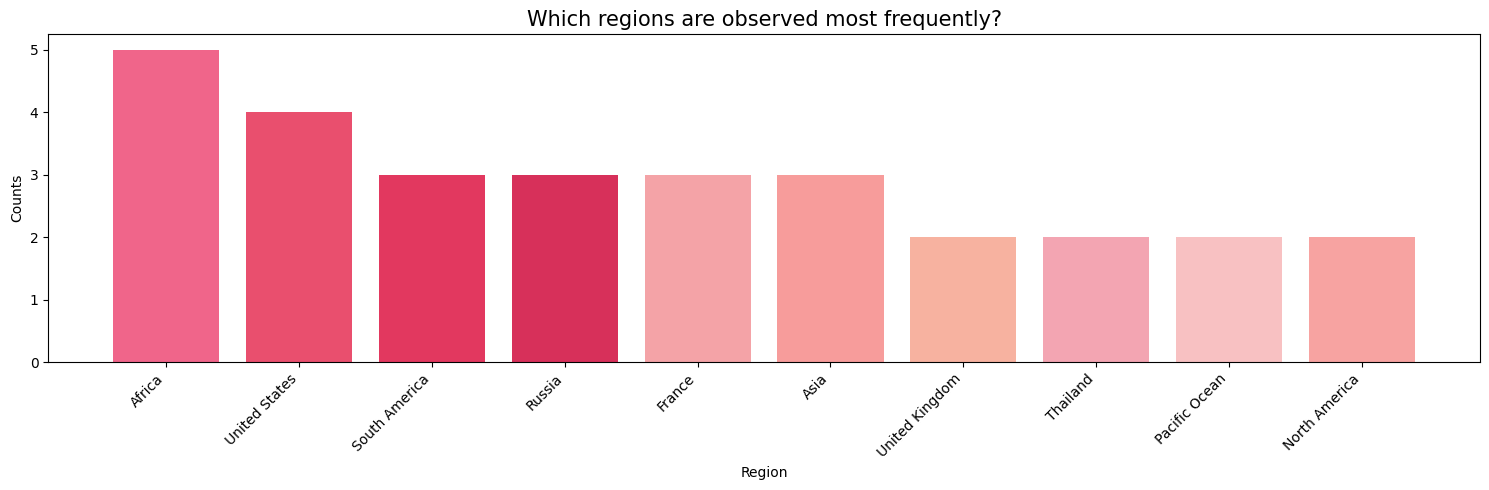

In [51]:
colors = ['#F0658A', '#E94F6E', '#E2385F', '#D7305A', '#F4A3A7', '#F79C9B', '#F7B2A0', '#F3A5B2', '#F8C1C2', '#F7A3A1']

plt.figure(figsize=(15,5))
plt.bar(region, sighting_counts, color=colors)
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.title('Which regions are observed most frequently?', fontsize=15)
plt.tight_layout()
plt.show()